<a href="https://colab.research.google.com/github/kkrusere/EV_Market-Analysis-and-Consumer-Behavior/blob/main/EV-Market_Analysis-%26-Consumer_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **<center> Electric Vehicle (EV) Market Analysis and Consumer Behavior </center>**

<center> <em>Understanding the EV Market Share, Growth & Trends, Vehicle Components' Supply Chain, Charging Infrastructure, Consumer Preferences, Pros & Cons, and Adoption Barriers</em></center>

<center><img src="https://github.com/kkrusere/EV_Market-Analysis-and-Consumer-Behavior/blob/main/assets/ev-eda-analysis.png?raw=1" width=600/></center>


##### **Introduction**

The electric vehicle (EV) market has experienced significant growth over the last decade, driven by environmental concerns, government policies, and advances in technology. However, the widespread adoption of EVs faces several challenges, including supply chain constraints, charging infrastructure limitations, and consumer reluctance. This project aims to provide a comprehensive analysis of the current EV market, supply chain dynamics, and consumer behaviors while presenting a neutral view of the advantages and disadvantages of EV adoption.



##### **Objectives:**
1. **EV Market Trends (2015-2030):** Analyze global EV market share and growth patterns from 2015 to 2030.
2. **Supply Chain Analysis:** Investigate the EV supply chain with a focus on critical components such as batteries and semiconductors, and highlight existing bottlenecks and projected future challenges over the period.
3. **Charging Infrastructure Growth (2015-2030):** Evaluate the growth and development of EV charging infrastructure during this period, identifying geographic disparities and potential gaps in future infrastructure needs.
4. **Consumer Preferences:** Assess evolving consumer preferences and barriers to adoption, such as cost, range anxiety, and environmental concerns, examining shifts from 2015 to projected trends in 2030.
5. **Pros & Cons:** Provide a balanced analysis of the advantages (e.g., environmental sustainability) and disadvantages (e.g., high initial costs) of EV adoption, considering both past trends and future projections.
6. **Prescriptive Insights (2015-2030):** Offer data-driven recommendations for policymakers and industry stakeholders to overcome key barriers to adoption and support the continued growth of the EV market through to 2030.


This notebook will apply a combination of descriptive, predictive, prescriptive, and geospatial analysis to achieve the outlined objectives. Data is drawn from industry reports, market research, and publicly available sources. The aim is to provide data-driven insights that can assist stakeholders—including governments, manufacturers, and consumers—in understanding the current state of the EV market and identifying potential strategies for its continued development.

In [1]:
from google.colab import drive, userdata
import os
import json
#mounting google drive
drive.mount('/content/drive')

########################################

#changing the working directory
os.chdir("/content/drive/MyDrive/EV_Data")

!pwd

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/EV_Data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive plots (optional)
%matplotlib inline

# Set seaborn style
sns.set(style='whitegrid')

The dataset in we are going to look at is sourced from the  [IEA Global EV Data 2024](https://www.iea.org/data-and-statistics/data-tools/global-ev-data-explorer)
, provides a comprehensive view of the electric vehicle (EV) landscape across various regions and timeframes. It combines historical data with projections to analyze trends in EV stock, sales, charging infrastructure, and energy demand.

**Key elements include:**

> - **Regions:** Countries and global segments where data is captured.
> - **Category:** Historical data and projections (e.g., STEPS and APS).
> - **Parameters:** EV-related metrics like sales share, stock share, electricity demand, and oil displacement.
> - **Modes:** Vehicle types, including cars, buses, vans, and trucks.
> - **Powertrain:** Types of powertrains, including BEV (Battery Electric Vehicle), PHEV (Plug-in Hybrid Electric Vehicle), and others.
> - **Years:** Spanning from 2010 to 2035, highlighting both past data and future projections.
> - **Units:** Measurement types, ranging from percentage to vehicles, charging points, and energy consumption (GWh, million barrels per day).

This dataset serves as a foundational tool for analyzing global EV trends, market growth, energy demands, and the transition to electric mobility up to 2035.

##### Loading the data

In [3]:
df_ev_data = pd.read_csv('IEA Global EV Data 2024.csv')
df_ev_data.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [28]:
# Below printed  out unique values in the column 'region','category','parameter',	'mode', 'powertrain'	'year','unit'

print("Unique values in 'region':", df_ev_data['region'].unique())
print("Unique values in 'category':", df_ev_data['category'].unique())
print("Unique values in 'parameter':", df_ev_data['parameter'].unique())
print("Unique values in 'mode':", df_ev_data['mode'].unique())
print("Unique values in 'powertrain':", df_ev_data['powertrain'].unique())
print("Unique values in 'year':", df_ev_data['year'].unique())
print("Unique values in 'unit':", df_ev_data['unit'].unique())

KeyError: 'region'

In [5]:
df_ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


1.1 Handling Missing Values
 - First, we check for missing values in the DataFrame:

In [6]:
# Check for missing values
print(df_ev_data.isnull().sum())


region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64


1.2 Standardizing Text Data

 - Ensure consistency in text data by converting all text to lowercase and stripping whitespace:

In [7]:
# Convert text columns to lowercase and strip whitespace
text_columns = ['region', 'category', 'parameter', 'mode', 'powertrain', 'unit']
for col in text_columns:
    df_ev_data[col] = df_ev_data[col].str.lower().str.strip()


1.3 Correcting Inconsistencies in 'region'

 - Check for inconsistent region names:

In [8]:
# For example, standardizing country names
df_ev_data['region'] = df_ev_data['region'].replace({
    'usa': 'united states',
    'eu27': 'european union',
    'turkiye': 'turkey',
})


1.4 Converting Data Types
 - Ensuring that numeric columns are correctly typed:

In [9]:
# Convert 'year' to integer
df_ev_data['year'] = df_ev_data['year'].astype(int)

# 'value' to float64
df_ev_data['value'] = df_ev_data['value'].astype(float)


1.5 Handling Duplicates

 - Checking and removing duplicate rows:

In [10]:
# Checking for duplicates
duplicate_rows = df_ev_data[df_ev_data.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

# Remove duplicates
df_ev_data = df_ev_data.drop_duplicates()


Number of duplicate rows: 0


In [11]:
# renaming columns
df_ev_data.rename(columns={
    'region': 'Region',
    'category': 'Category',
    'parameter': 'Parameter',
    'mode': 'Mode',
    'powertrain': 'Powertrain',
    'year': 'Year',
    'unit': 'Unit',
    'value': 'Value'
}, inplace=True)


1.6 Handling Units and Conversions

 - Ensure that units are consistent for each parameter:

In [12]:
# # Check units for each parameter
# print(df_ev_data.groupby(['Parameter', 'Unit']).size())

# # If necessary, convert units to standardize (e.g., million to units)
# # Example for 'Oil displacement, million lge':
# df_ev_data.loc[df_ev_data['Unit'] == 'oil displacement, million lge', 'Value'] *= 1_000_000
# df_ev_data.loc[df_ev_data['Unit'] == 'oil displacement, million lge', 'Unit'] = 'oil displacement, lge'


1.7 Pivoting Data for Analysis

 - Reshape the DataFrame to facilitate analysis:

In [13]:
# Pivoting the data to have years as rows and regions as columns for a specific parameter
pivot_table = df_ev_data.pivot_table(
    index='Year',
    columns='Region',
    values='Value',
    aggfunc='sum'
)


In [14]:
# droping rows
powertrain_exclude = ['ev', 'publicly available fast', 'publicly available slow', 'fcev']

for value in powertrain_exclude:
  df_ev_data = df_ev_data[df_ev_data.Powertrain != value]

df_ev_data = df_ev_data[df_ev_data.Mode != 'ev']

In [15]:
# Fixing the typo in the 'Unit' column
# There is a typo in the Unit column: 'milion barrels per day' should be 'million barrels per day'
df_ev_data['Unit'] = df_ev_data['Unit'].replace({
    'milion barrels per day': 'million barrels per day'
})

# Renaming 'world' to 'global' and removing 'rest of the world'
# There are some redundant or ambiguous region names like 'world' and 'rest of the world'.
df_ev_data['Region'] = df_ev_data['Region'].replace({
    'world': 'global'
})
df_ev_data = df_ev_data[df_ev_data['Region'] != 'rest of the world']

# Keeping relevant parameters
# For EV market share and trends analysis, we'll focus on  key parameters ev sales, ev stock, ev sales share, and ev stock share.
relevant_parameters = ['ev sales', 'ev stock', 'ev sales share', 'ev stock share']
df_ev_data = df_ev_data[df_ev_data['Parameter'].isin(relevant_parameters)]



In [16]:
# Filter data for years between 2015 and 2030 (inclusive)
df_ev_data = df_ev_data[(df_ev_data['Year'] >= 2015) & (df_ev_data['Year'] <= 2030)]


In [17]:
df_ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3931 entries, 22 to 12535
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Region      3931 non-null   object 
 1   Category    3931 non-null   object 
 2   Parameter   3931 non-null   object 
 3   Mode        3931 non-null   object 
 4   Powertrain  3931 non-null   object 
 5   Year        3931 non-null   int64  
 6   Unit        3931 non-null   object 
 7   Value       3931 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 276.4+ KB


#### **Exploratory Data Analysis (EDA)**

**Distribution of EV Sales and Stock** : Analyzing the distribution of EV sales and stock values.

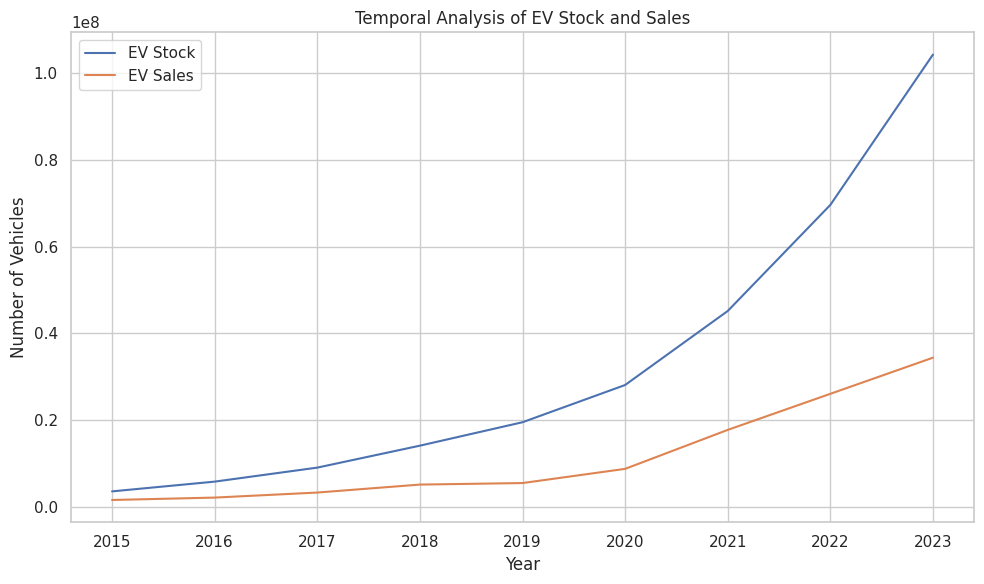

In [29]:
# Filtering data for EV stock and sales
ev_stock = df_ev_data[(df_ev_data['Parameter'] == 'ev stock') & (df_ev_data['Category'] == 'historical')]
ev_sales = df_ev_data[(df_ev_data['Parameter'] == 'ev sales') & (df_ev_data['Category'] == 'historical')]

# Grouping data by year and calculate total EV stock and sales for each year
ev_stock_yearly = ev_stock.groupby('Year')['Value'].sum()
ev_sales_yearly = ev_sales.groupby('Year')['Value'].sum()


plt.figure(figsize=(10, 6))

plt.plot(ev_stock_yearly.index, ev_stock_yearly.values, label='EV Stock')
plt.plot(ev_sales_yearly.index, ev_sales_yearly.values, label='EV Sales')

plt.title('Temporal Analysis of EV Stock and Sales')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(True)

plt.xticks(ev_stock_yearly.index)
plt.tight_layout()
plt.show()


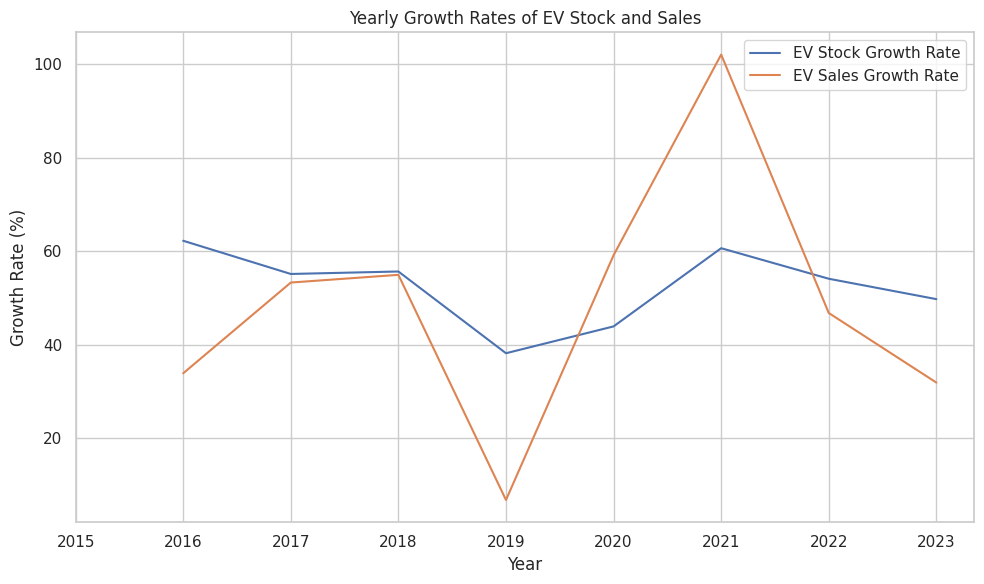

In [30]:
# Yearly Growth Rates
ev_stock_yearly_growth = ev_stock_yearly.pct_change() * 100
ev_sales_yearly_growth = ev_sales_yearly.pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(ev_stock_yearly_growth.index, ev_stock_yearly_growth.values, label='EV Stock Growth Rate')
plt.plot(ev_sales_yearly_growth.index, ev_sales_yearly_growth.values, label='EV Sales Growth Rate')
plt.title('Yearly Growth Rates of EV Stock and Sales')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(ev_stock_yearly_growth.index)
plt.tight_layout()
plt.show()

Regional Analysis
1. **Top Regions by Total EV Sales:** Identifying the regions with the highest EV sales

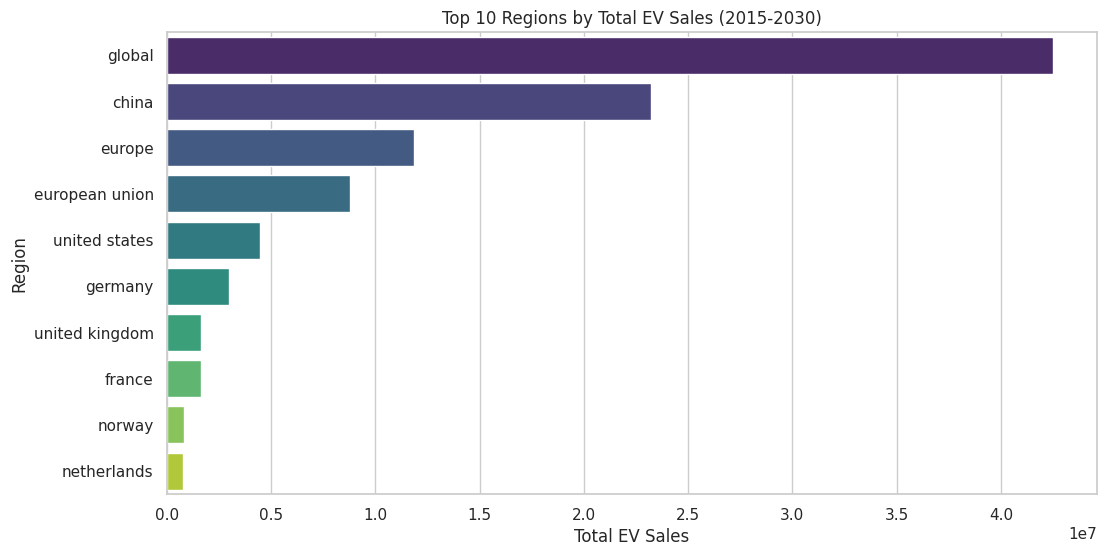

In [32]:
# Total EV sales by region
region_ev_sales = ev_sales.groupby('Region')['Value'].sum().reset_index()

# Top 10 regions
top_regions = region_ev_sales.sort_values(by='Value', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_regions, x='Value', y='Region', palette='viridis')
plt.title('Top 10 Regions by Total EV Sales (2015-2030)')
plt.xlabel('Total EV Sales')
plt.ylabel('Region')
plt.show()


2. EV Sales Over Time in Top Regions

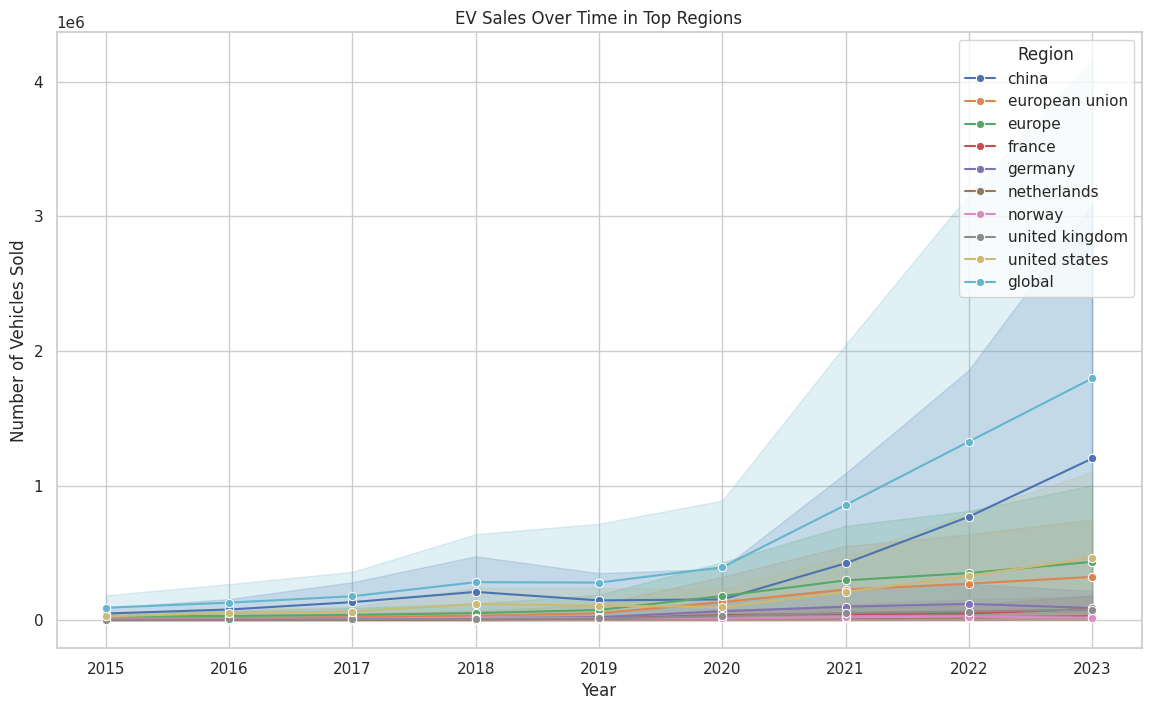

In [33]:
# Filter data for top regions
top_region_list = top_regions['Region'].tolist()
ev_sales_top_regions = ev_sales[ev_sales['Region'].isin(top_region_list)]

plt.figure(figsize=(14,8))
sns.lineplot(data=ev_sales_top_regions, x='Year', y='Value', hue='Region', marker='o')
plt.title('EV Sales Over Time in Top Regions')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')
plt.legend(title='Region')
plt.grid(True)
plt.show()


Powertrain Analysis
1. **EV Sales by Powertrain Type:** Comparing the total sales of BEVs (Battery Electric Vehicles) and PHEVs (Plug-in Hybrid Electric Vehicles).

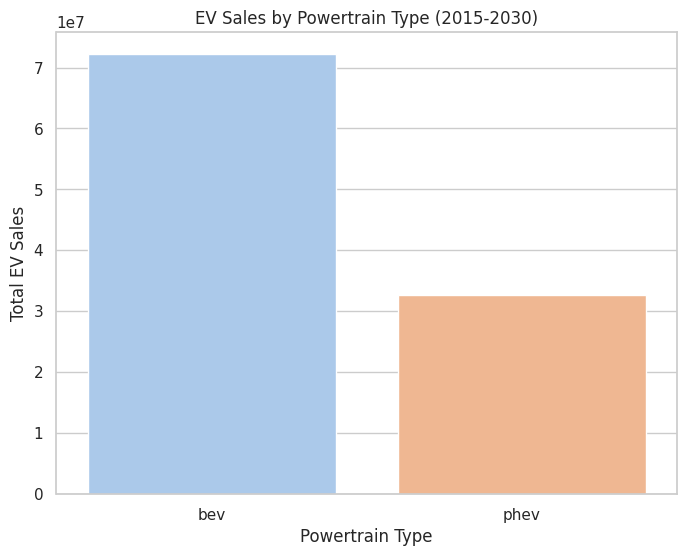

In [34]:
# EV sales by powertrain
powertrain_sales = ev_sales.groupby('Powertrain')['Value'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=powertrain_sales, x='Powertrain', y='Value', palette='pastel')
plt.title('EV Sales by Powertrain Type (2015-2030)')
plt.xlabel('Powertrain Type')
plt.ylabel('Total EV Sales')
plt.show()


2. **Powertrain Trends Over Time:** Analyze how the sales of BEVs & PHEVs have changed over time and identifying any shifts in market preference.

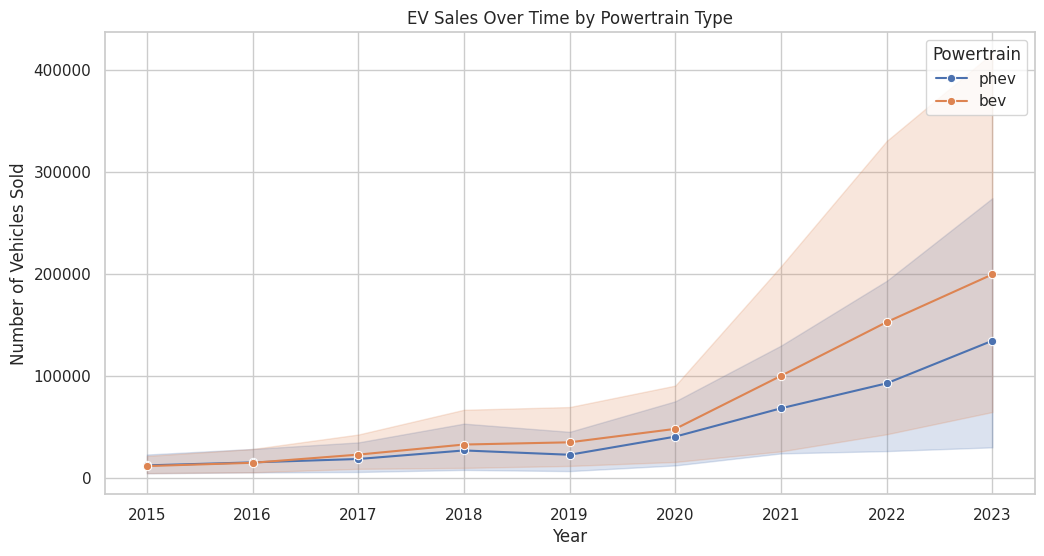

In [35]:
plt.figure(figsize=(12,6))
sns.lineplot(data=ev_sales, x='Year', y='Value', hue='Powertrain', marker='o')
plt.title('EV Sales Over Time by Powertrain Type')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')
plt.legend(title='Powertrain')
plt.grid(True)
plt.show()


Vehicle Mode Analysis

1. **EV Sales by Vehicle Mode:** Determine which vehicle modes (cars, buses, vans, trucks) are most popular in the EV market, might helps access and focus on which segments with the highest adoption.

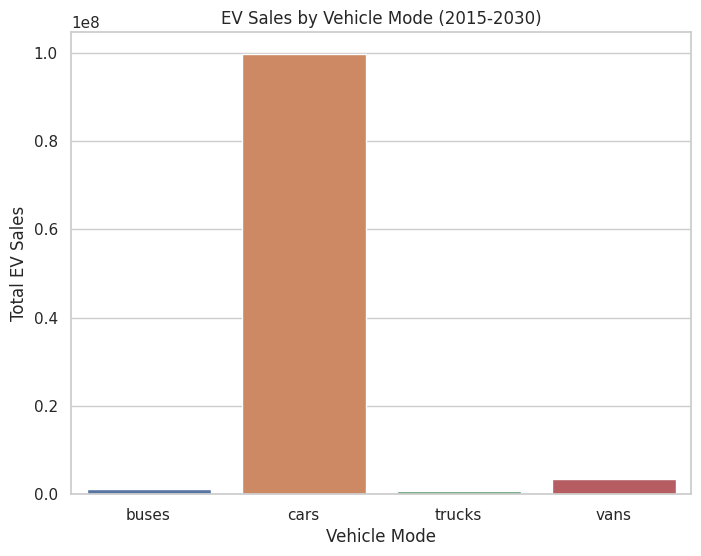

In [36]:
# EV sales by mode
mode_sales = ev_sales.groupby('Mode')['Value'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=mode_sales, x='Mode', y='Value', palette='deep')
plt.title('EV Sales by Vehicle Mode (2015-2030)')
plt.xlabel('Vehicle Mode')
plt.ylabel('Total EV Sales')
plt.show()


Projection Analysis
1. **Comparing Historical Data with Projections:** Separate historical data and projections for analysis.